# Imports

## Libraries

In [91]:
library(tidyverse)
library(Hmisc) # cut2

## set universal plot size:
options(repr.plot.width=7, repr.plot.height=3.5)

## Data

### Load
---
Already Cleaned

**++ADD cleaning parameters** to `ma_clean_data` file

---

In [17]:
load("../data/swap_v1_clean.RData")
load("../data/swap_v2_clean.RData")

# rename for simplicity
v1 = swap_v1_clean
v2 = swap_v2_clean
# clean up
rm(swap_v1_clean, swap_v2_clean)

In [16]:
head(v1, 3)
head(v2, 3)

Trial,correct,faceVal,houseVal,mult1House,mult2Face,summedVal,earnings,imageList,flip,⋯,4_fixation,5_fixation,6_fixation,7_fixation,8_fixation,9_fixation,10_fixation,11_fixation,12_fixation,13_fixation
1,1,0.66,0.86,2,2,3.04,39.60,"[1, 0, 1, 0, 1, 0]",2,⋯,0.433219,1.233326,2.699835,NA,NA,NA,NA,NA,NA,NA
2,0,0.38,-0.52,1,1,-0.14,39.46,"[0, 1, 0]",2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,0.32,-0.68,1,3,0.28,39.74,"[0, 1, 0]",1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,choice,correct,earnings,face_mult,face_val_base,first_image,house_mult,house_val_base,image_list,key_entry_list,⋯,absSummedVal,swapAmount,firstMult,firstVal,secondMult,secondVal,faceTotal,houseTotal,total_0_face,total_1_house
10,0,1,-10.600,2.0,-0.38,1,0.5,-0.72,"[1, 0, 1]","['space', 'space', 'j']",⋯,1.120,3,0.5,-0.36,2.0,-0.760,-0.76,-0.360,1.6668216,4.616794
11,1,1,-10.306,0.5,0.50,0,0.1,0.44,"[0, 1]","['space', 'f']",⋯,0.294,2,0.5,0.25,0.1,0.044,0.25,0.044,0.9669452,2.850013
13,0,1,-10.646,1.0,-0.40,0,1.0,-0.78,"[0, 1, 0, 1]","['space', 'space', 'space', 'j']",⋯,1.180,4,1.0,-0.40,1.0,-0.780,-0.40,-0.780,0.9169345,2.099861


### Format

In [ ]:
# Bin responses
v1$bin = cut2(v1$summedVal, g=19, levels.mean=TRUE, digits=2)
v2$bin = cut2(v2$summedVal, g=19, levels.mean=TRUE, digits=2)

v1$bin_abs = cut2(abs(v1$summedVal), g=10, levels.mean=TRUE, digits=2)
v2$bin_abs = cut2(abs(v2$summedVal), g=10, levels.mean=TRUE, digits=2)

# Psychometrics

## RT
by Abs. Offer Value

### V1

In [131]:
df = v1

subjects = length(unique(df$subject))

rt = df %>%
    group_by(subject, bin_abs) %>%
    summarise(rt = mean(rt)) %>%
    group_by(bin_abs) %>%
    summarise(N = length(rt),
              rt_se = sd(rt) / sqrt(subjects),
              rt = mean(rt)
             ) %>%
    mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

head(rt, 3)

bin_abs,N,rt_se,rt
0.06,23,0.2260056,3.462391
0.18,23,0.2242383,3.272296
0.27,23,0.2445968,3.334918


#### Plot

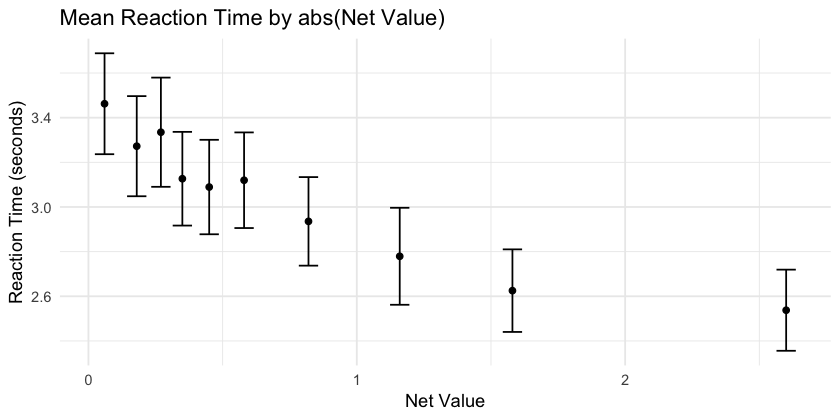

In [132]:
ggplot(data = rt,aes(x = bin_abs,y = rt)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = rt-rt_se,ymax = rt+rt_se)) + 
  labs(x = "Net Value", y = "Reaction Time (seconds)") +
  theme_minimal() +
  ggtitle("Mean Reaction Time by abs(Net Value)")

### V2

In [129]:
df = v2

subjects = length(unique(df$subject))

rt = df %>%
    group_by(subject, bin_abs) %>%
    summarise(rt = mean(rt)) %>%
    group_by(bin_abs) %>%
    summarise(N = length(rt),
              rt_se = sd(rt) / sqrt(subjects),
              rt = mean(rt)
             ) %>%
    mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

head(rt, 3)

bin_abs,N,rt_se,rt
0.06,31,0.1436890,4.090551
0.20,31,0.1596938,4.035085
0.38,31,0.1459261,3.811187


#### Plot

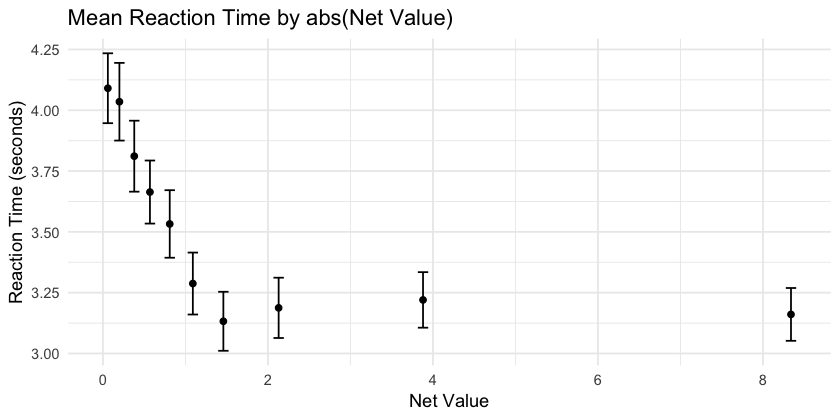

In [130]:
ggplot(data = rt,aes(x = bin_abs,y = rt)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = rt-rt_se,ymax = rt+rt_se)) + 
  labs(x = "Net Value", y = "Reaction Time (seconds)") +
  theme_minimal() +
  ggtitle("Mean Reaction Time by abs(Net Value)")

### V3.0.1

#### Plot

### V3.0.2

#### Plot

### V3.1.0

#### Plot

### Comparisons

#### Plot

## Fixations
by Abs. Offer Value

### V1

In [127]:
df = v1

subjects = length(unique(df$subject))

fix = df %>%
    group_by(subject, bin_abs) %>%
    summarise(swaps = mean(swapAmount)) %>%
    group_by(bin_abs) %>%
    summarise(N = length(swaps),
              fix_se = sd(swaps) / sqrt(subjects),
              fix_num = mean(swaps)
             ) %>%
    mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

head(fix, 3)

bin_abs,N,fix_se,fix_num
0.06,23,0.1252995,3.291546
0.18,23,0.1326401,3.218687
0.27,23,0.1397366,3.218578


#### Plot

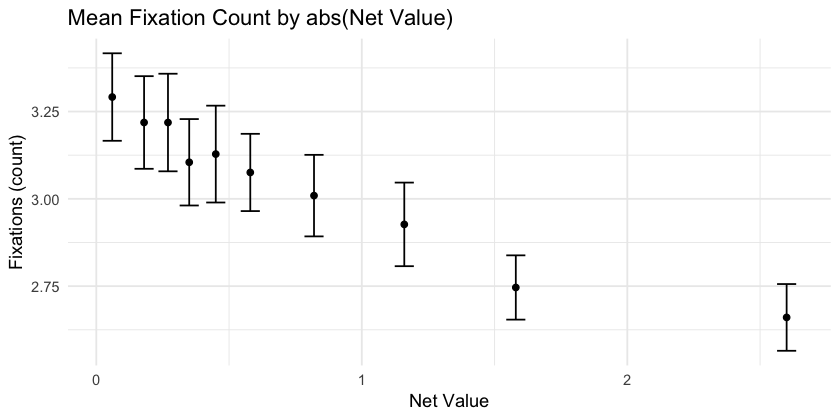

In [128]:
ggplot(data = fix,aes(x = bin_abs,y = fix_num)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = fix_num-fix_se,ymax = fix_num+fix_se)) + 
  labs(x = "Net Value", y = "Fixations (count)") +
  theme_minimal() +
  ggtitle("Mean Fixation Count by abs(Net Value)")

### V2

In [123]:
df = v2

subjects = length(unique(df$subject))

fix = df %>%
    group_by(subject, bin_abs) %>%
    summarise(swaps = mean(swapAmount)) %>%
    group_by(bin_abs) %>%
    summarise(N = length(swaps),
              fix_se = sd(swaps) / sqrt(subjects),
              fix_num = mean(swaps)
             ) %>%
    mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

head(fix, 3)

bin_abs,N,fix_se,fix_num
0.06,31,0.1547338,3.782820
0.20,31,0.1276974,3.643790
0.38,31,0.1343699,3.563872


#### Plot

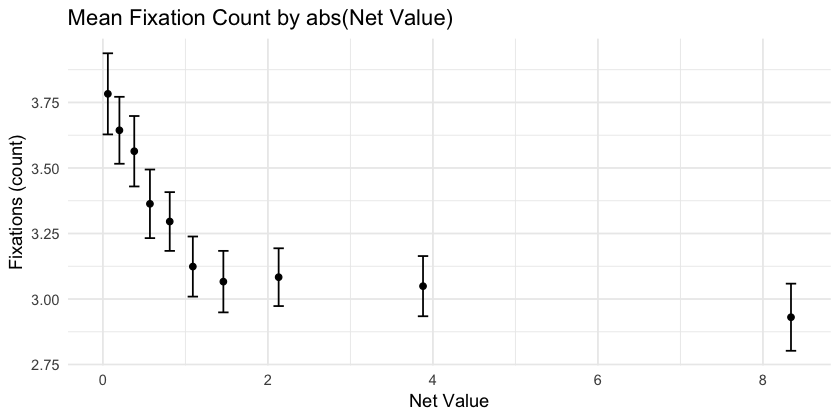

In [126]:
ggplot(data = fix,aes(x = bin_abs,y = fix_num)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = fix_num-fix_se,ymax = fix_num+fix_se)) + 
  labs(x = "Net Value", y = "Fixations (count)") +
  theme_minimal() +
  ggtitle("Mean Fixation Count by abs(Net Value)")

### V3.0.1

#### Plot

### V3.0.2

#### Plot

### V3.1.0

#### Plot

### Comparisons

#### Plot

## P(Accept)
by Offer Value

### V1

In [133]:
df = v1

subjects = length(unique(df$subject))

# p(accept)
p_a = df %>%
    group_by(subject, bin) %>%
    summarise(accept = mean(choice)) %>%
    group_by(bin) %>%
    summarise(N = length(accept),
              accept_se = sd(accept, na.rm=TRUE) / sqrt(subjects),
              accept = mean(accept)
             ) %>%
    mutate(bin = round(as.numeric(as.character(bin)), 2))

head(p_a, 3)

bin,N,accept_se,accept
-2.54,23,0.017092877,0.04883540
-1.54,23,0.014700669,0.04829321
-1.10,23,0.009862021,0.07498281


#### Plot

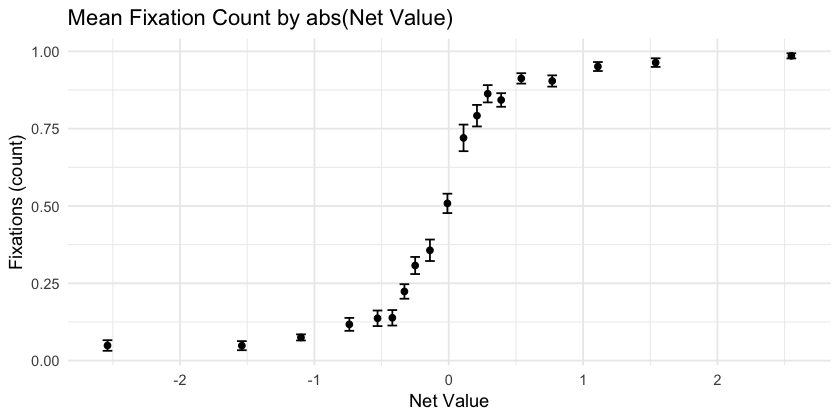

In [134]:
ggplot(data = p_a,aes(x = bin,y = accept)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = accept-accept_se, ymax = accept+accept_se)) + 
  labs(x = "Net Value", y = "Fixations (count)") +
  theme_minimal() +
  ggtitle("Mean Fixation Count by abs(Net Value)")

### V2

In [138]:
df = v2

subjects = length(unique(df$subject))

# p(accept)
p_a = df %>%
    group_by(subject, bin) %>%
    summarise(accept = mean(choice)) %>%
    group_by(bin) %>%
    summarise(N = length(accept),
              accept_se = sd(accept, na.rm=TRUE) / sqrt(subjects),
              accept = mean(accept, na.rm=TRUE)
             ) %>%
    mutate(bin = round(as.numeric(as.character(bin)), 2))

head(p_a, 3)

bin,N,accept_se,accept
-8.12,31,0.01387307,0.03528732
-3.63,31,0.01621134,0.06879851
-1.98,31,0.01412080,0.07554009


#### Plot

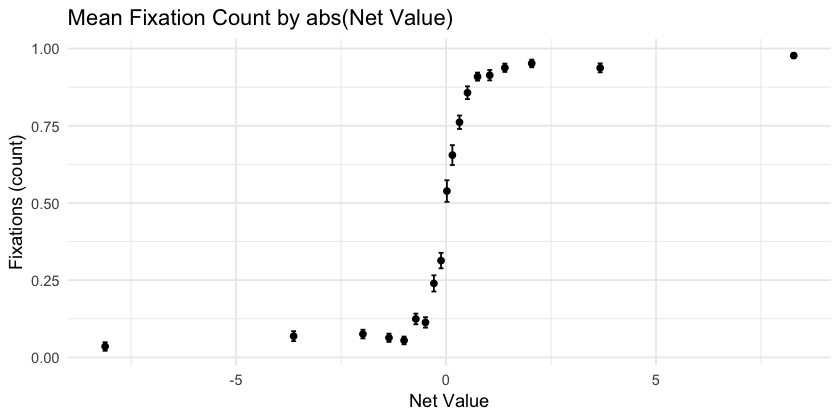

In [140]:
ggplot(data = p_a,aes(x = bin,y = accept)) + 
  geom_point() + 
  #geom_line() +
  geom_errorbar(aes(ymin = accept-accept_se, ymax = accept+accept_se)) + 
  labs(x = "Net Value", y = "Fixations (count)") +
  theme_minimal() +
  ggtitle("Mean Fixation Count by abs(Net Value)")

### V3.0.1

#### Plot

### V3.0.2

#### Plot

### V3.1.0

#### Plot

### Comparisons

#### Plot

# Attention

## Base Value

### First Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Middle Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Final Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

## Multiplier

### First Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Middle Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Final Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

## Weighted Value

### First Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Middle Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

### Final Fixation

#### V1

#### V2

#### V3.0.1

#### V3.0.2

#### V3.1.0

#### Comparisons

# Choice ~ Attention & Value